In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('song_dataset.csv')


# Display the first few rows of the dataframe
print(df.head())


                                       user                song  play_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995         1.0   
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAPDEY12A81C210A9         1.0   
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B         2.0   
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBFNSP12AF72A0E22         1.0   
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBFOVM12A58A7D494         1.0   

                             title  \
0                         The Cove   
1             Nothing from Nothing   
2                  Entre Dos Aguas   
3            Under Cold Blue Stars   
4  Riot Radio (Soundtrack Version)   

                                             release    artist_name    year  
0                                 Thicker Than Water   Jack Johnson     0.0  
1                                         To Die For  Billy Preston  1974.0  
2                                Flamenco Para Niños  Paco De 

## What are the most listened songs?

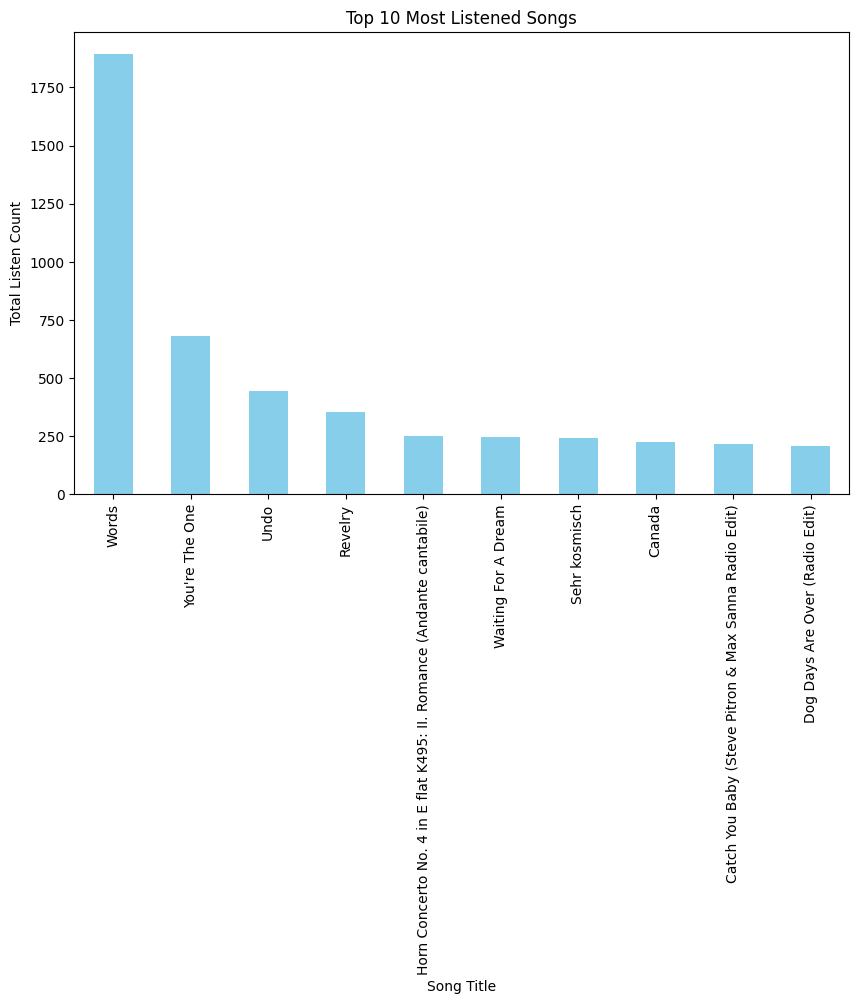

In [ ]:
import matplotlib.pyplot as plt

# Group by song and calculate total listen count
song_listen_count = df.groupby('title')['play_count'].sum().sort_values(ascending=False)

# Plot the top 10 most listened songs
plt.figure(figsize=(10, 6))
song_listen_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Listened Songs')
plt.xlabel('Song Title')
plt.ylabel('Total Listen Count')
plt.show()


In [ ]:
# Display the column names in the dataframe
print(df.columns)


Index(['user', 'song', 'play_count', 'title', 'release', 'artist_name',
       'year'],
      dtype='object')


# Who are the most popular artists?



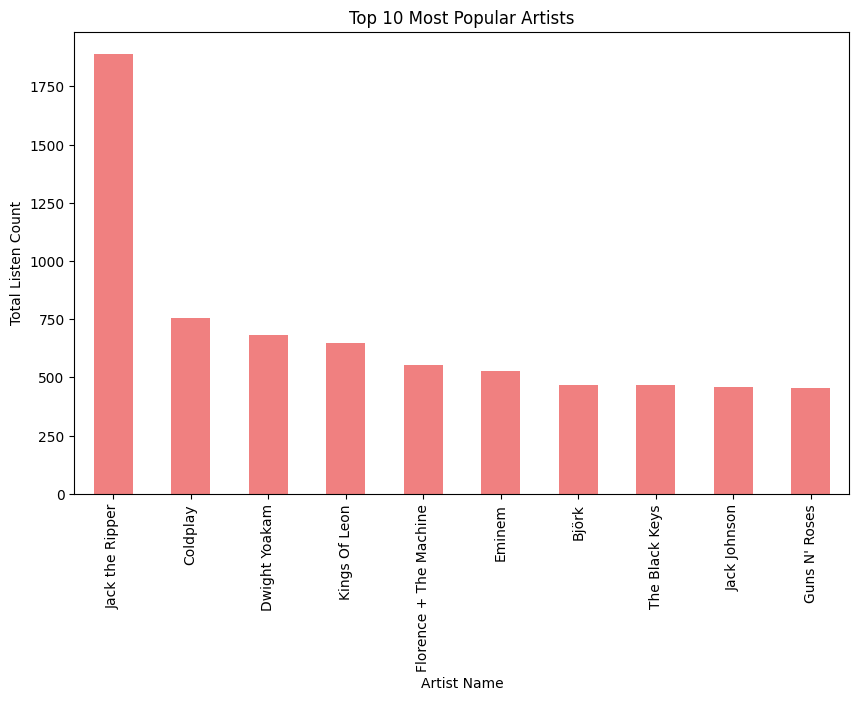

In [ ]:
# Group by artist and calculate total listen count
artist_listen_count = df.groupby('artist_name')['play_count'].sum().sort_values(ascending=False)

# Plot the top 10 most popular artists
plt.figure(figsize=(10, 6))
artist_listen_count.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Popular Artists')
plt.xlabel('Artist Name')
plt.ylabel('Total Listen Count')
plt.show()


# How is the distribution of song count for users?



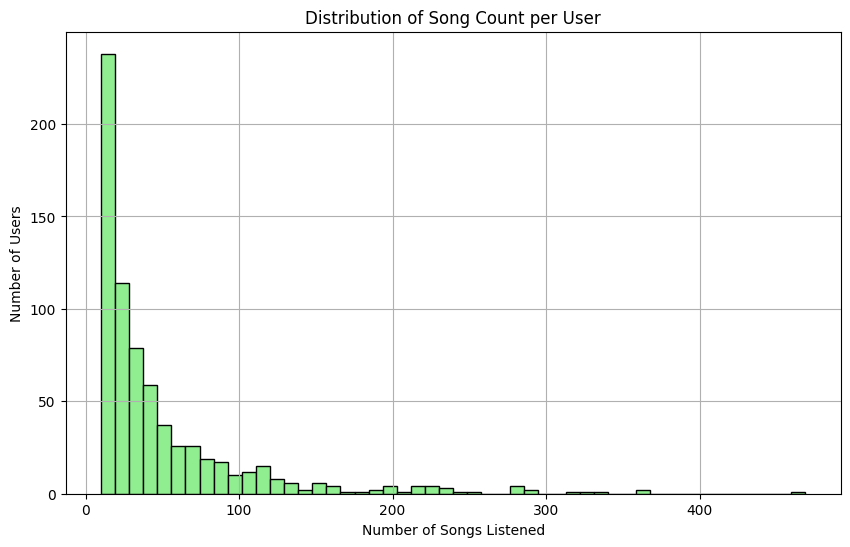

In [ ]:
# Plot the distribution of song count per user
plt.figure(figsize=(10, 6))
df.groupby('user')['song'].count().hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Song Count per User')
plt.xlabel('Number of Songs Listened')
plt.ylabel('Number of Users')
plt.show()


# Question 2: Recommendation Engine Implementation



For the recommendation engine, collaborative filtering or content-based filtering approaches can be used. Collaborative filtering is often effective, especially for music recommendations.



In [ ]:
# Install the surprise library
!pip install scikit-surprise

# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# Load the dataset for the surprise library
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(df[['user', 'song', 'play_count']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Build the recommendation model using collaborative filtering (KNNBasic)
model = KNNBasic(sim_options={'user_based': False})
model.fit(trainset)

# Function to get recommendations for a user
def get_recommendations(user_id, num_recommendations=1):
    user_unseen_songs = df.loc[~df['song'].isin(df[df['user'] == user_id]['song'])]['song'].unique()
    predictions = [model.predict(user_id, song) for song in user_unseen_songs]
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:num_recommendations]
    return recommendations

# Example: Get recommendations for user 1
user_id = 1
recommendations = get_recommendations(user_id, num_recommendations=3)

# Display recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"Recommendation {i}: Song {rec.iid} with estimated rating {rec.est}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163476 sha256=4216b0eb9aa09d920bd30189eff8e56dc12a5dbc754d590966517562572995df
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise
Computing the msd similarity matrix...
Done computing similarity matrix.
Recommendation 1: Song SOAKIMP12A8C130995 with estimated rating 100
Recommendation 2: Song SOAPDEY12A81C210A9 with estimated rating 100
Recommendation 3: Song SOBBMDR12A8C13253B with estimated rating 100
